In [1]:
import ttvfast
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from ttvfast import models
import pdb



gravity =  0.000295994511                        # AU^3/day^2/M_sun
stellar_mass = 0.518 #0.95573417954    #change me                # M_sun


planet1 = models.Planet(
    mass=0.00954588, #0.00002878248,                         # M_sun
    period=1.4079405,#1.0917340278625494e+01,              # days
    eccentricity=0,#5.6159310042858110e-02,
    inclination=88.778,#9.0921164935951211e+01,         # degrees
    longnode=-1.1729336712101943e-18,           # degrees
    argument=1.8094838714599581e+02,            # degrees
    mean_anomaly= -90 #-8.7093652691581923e+01,       # degrees
)

planet2 = models.Planet(
    mass=0.00954588,#0.00061895914,
    period=200,#1.4079405,#2.2266898036209028e+01,
    eccentricity= 0.7, #5.6691301931178648e-02,
    inclination=8.7598285693573246e+01,
    longnode=4.6220554014026838e-01,
    argument=1.6437004273382669e+00,
    mean_anomaly=-1.9584857031843157e+01,
)

planets = [planet1, planet2]
Time = 66.70357200363651-1.4079405+0.003714472890699483 #-1045                                    # days
dt = 0.02                                       # days
Total = 510 #1700                                    # days

results = ttvfast.ttvfast(planets, stellar_mass, Time, dt, Total)
#print(results)

In [2]:
#print(results.keys())
#print(results["positions"][2])
whichplanet = results["positions"][0]
whichtransit = results["positions"][1]
transittimes = results["positions"][2]
planet1transits = []
planet1times = []
transittimesplanet0 = []
transitnumberplanet0 = []
for i in range(375):
    a = whichplanet[i]
    condition = a==0  
    if condition: 
        transittimesplanet0.append(transittimes[i] )
        transitnumberplanet0.append(whichtransit[i] )

In [3]:
# df=pd.read_csv(r'/Users/sarahkubiak/Desktop/WD1856/test.txt', sep=' ')
df=pd.read_csv(r'/Users/sarahkubiak/Desktop/WD1856/newdatawithoutbadthings.txt', sep=' ')
df

,Time,Uncertainty
0,2.459016e+06,0.000002
1,2.459033e+06,0.000002
2,2.459061e+06,0.000002
3,2.459085e+06,0.000002
4,2.459092e+06,0.000003
5,2.459095e+06,0.000009
6,2.459102e+06,0.000002
7,2.459116e+06,0.000003
8,2.459126e+06,0.000002
9,2.459140e+06,0.000003


In [4]:
brucetransittime=np.array(df['Time'])
#brucetransittime= 1.40794050*brucetransitnumber + 2458779.3750828
brucetransitnumber= np.round((brucetransittime-2458779.3750828)/1.40794050)
#brucex= brucetransitnumber
#brucey=np.array(df['dT[sec]'])
bruceerr= np.array(df['Uncertainty'])*60*60*24
#fig, ax = plt.subplots(figsize=(16, 8))

#plt.errorbar(brucex, brucey, yerr = bruceerr, fmt = 'o')
#ax.set_ylabel('seconds');
#ax.set_xlabel('transit number');

In [5]:
actualbrucetransittime = np.array(df['Time'])-2458700

In [6]:
print(actualbrucetransittime[0])

315.9088683668524


In [7]:
print(transittimesplanet0[0])

66.703572003636


In [8]:
actualbrucetransittime[14]-actualbrucetransittime[0]

-1.407952366862446

In [9]:
transittimesplanet0[0]- actualbrucetransittime[0]

-249.2052963632164

In [10]:
transittimesplanet0 = np.array(transittimesplanet0)
print(transittimesplanet0[np.array([0, 2, 5])])

[66.703572   69.51945347 73.74333002]


In [11]:
#for i in range(29):
    #print('datapoint number', i,'coresponds to transit time', transittimesplanet0[i] )
print(transittimesplanet0[9])
print(transittimesplanet0[157])
print(transittimesplanet0[174])
print(transittimesplanet0[311])
for i in range(14):
    print(' bruce transit number', brucetransitnumber[i],'coresponds to transit time', actualbrucetransittime[i] )
    #for j in range(len(transittimesplanet0)):
        #print(transittimesplanet0[i])
        #condition = actualbrucetransittime[i]==transittimesplanet0[i]
        #if condition: 
            #print(i)
transitswewant = (brucetransitnumber + 9)
transitswewant = (transitswewant.astype(int))
print(transitswewant)

79.37518705156312
287.74876840384854
311.6835128489974
504.56979627384464
 bruce transit number 168.0 coresponds to transit time 315.9088683668524
 bruce transit number 180.0 coresponds to transit time 332.80413679406047
 bruce transit number 200.0 coresponds to transit time 360.9629293610342
 bruce transit number 217.0 coresponds to transit time 384.8978941459209
 bruce transit number 222.0 coresponds to transit time 391.93759056413546
 bruce transit number 224.0 coresponds to transit time 394.753486501053
 bruce transit number 229.0 coresponds to transit time 401.793159971945
 bruce transit number 239.0 coresponds to transit time 415.87255670595914
 bruce transit number 246.0 coresponds to transit time 425.728129317984
 bruce transit number 256.0 coresponds to transit time 439.80752397188917
 bruce transit number 0.0 coresponds to transit time 79.37508499994874
 bruce transit number 94.0 coresponds to transit time 211.72136700013652
 bruce transit number 143.0 coresponds to transit t

In [12]:
print((np.array(transittimesplanet0)[transitswewant]-actualbrucetransittime) * 24 * 60 * 60)

[-136.33910311 -150.10416608 -174.18533778 -193.84287186 -199.66576359
 -203.4872703  -207.27673653 -218.92133172 -226.13875391 -231.69492244
    8.81725948  -89.71567339 -107.99827277 -115.55639567 -134.04587027]


In [13]:
chisq = np.sum(((actualbrucetransittime - np.array(transittimesplanet0)[transitswewant]) * 24 * 60 * 60)**2 / bruceerr**2)
print(chisq)

9020588.128618864


In [14]:
def loglikelihood(p, actualbrucetransittime, bruceerr, yesplot= False): #here p is an array of the parameters: let's define p[0] = slope, and p[1] = intercept
    #slope = p[0]
    #intercept = p[1]
    #quad = p[2]
    #model = slope*x + intercept+ quad*x**2
    #chisq = np.sum((y - model)**2 / e**2)
    
    gravity =  0.000295994511                        # AU^3/day^2/M_sun
    stellar_mass = 0.518 #0.95573417954    #change me                # M_sun


    planet1 = models.Planet(
        mass = 0.00954588, #0.00002878248,                         # M_sun
        period = p[7],#1.4079405,#1.0917340278625494e+01,              # days
        eccentricity = 0,#5.6159310042858110e-02,
        inclination = 20,#88.778,#9.0921164935951211e+01,         # degrees
        longnode = -1.1729336712101943e-18,           # degrees
        argument = 1.8094838714599581e+02,            # degrees
        mean_anomaly = p[8],#-90 #-8.7093652691581923e+01,       # degrees
    )

    planet2 = models.Planet(
        mass = p[0],#0.00954588,#0.00061895914,
        period = p[1],#200,#1.4079405,#2.2266898036209028e+01,
        eccentricity = p[2],#0.7, #5.6691301931178648e-02,
        inclination = p[3],#8.7598285693573246e+01,
        longnode = p[4],#4.6220554014026838e-01,
        argument = p[5],#1.6437004273382669e+00,
        mean_anomaly = p[6],#-1.9584857031843157e+01,
    )

    planets = [planet1, planet2]
    Time = 66.70357200363651-1.4079405+0.003714472890699483 #-1045                                    # days
    dt = 0.02                                       # days
    Total = 600 #1700                                    # days

    results = ttvfast.ttvfast(planets, stellar_mass, Time, dt, Total)
    whichplanet = results["positions"][0]
    whichtransit = results["positions"][1]
    transittimes = results["positions"][2]
    planet1transits = []
    planet1times = []
    transittimesplanet0 = []
    transitnumberplanet0 = []
    for i in range(375):
        a = whichplanet[i]
        condition = a == 0  
        if condition: 
            transittimesplanet0.append(transittimes[i] )
            transitnumberplanet0.append(whichtransit[i] )
    
    
    if yesplot: 
        fig, ax = plt.subplots(figsize=(16, 8))
    #m=np.mean((actualbrucetransittime-1.4079405*brucetransitnumber)*24*60*60)
    #model data- model line 
    #plt.errorbar(brucetransitnumber, (actualbrucetransittime-1.4079405*brucetransitnumber)*24*60*60-m, yerr = bruceerr, fmt = 'o-', label = 'Data')
    #print(actualbrucetransittime)
    #print(np.array(transittimesplanet0)[transitswewant])
    #bruce data- model line 
    #plt.plot(brucetransitnumber, (np.array(transittimesplanet0)[transitswewant]-1.4079405*brucetransitnumber)*24*60*60-m,"o-", label = 'Model')
    #ax.set_ylabel('seconds');
    '''ax.set_xlabel('transit number');
    ax.set_title('mass = '+ str(p[0])+ ' period ='+ str(p[1]))
    plt.show()'''
    '''print(np.array(transittimesplanet0)[transitswewant[0:5]])
    print(actualbrucetransittime[0:5])'''
    #pdb.set_trace()
    pbruce = np.polyfit(brucetransitnumber,actualbrucetransittime,1, w= 1/bruceerr)
    pmodel = np.polyfit(brucetransitnumber,np.array(transittimesplanet0)[transitswewant],1,w= 1/bruceerr)
    brucetrend = np.polyval(pbruce,brucetransitnumber)
    modeltrend = np.polyval(pmodel,brucetransitnumber)
    brucetransittimecorrected = actualbrucetransittime - brucetrend
    modeltransittimecorrected = np.array(transittimesplanet0)[transitswewant] - modeltrend
    if yesplot:
        plt.errorbar(brucetransitnumber,brucetransittimecorrected*60*60*24, yerr = bruceerr, fmt = 'o-', label = 'Corrected Data')
        print(actualbrucetransittime)
        print(np.array(transittimesplanet0)[transitswewant])
        #bruce data- model line 
        plt.plot(brucetransitnumber, modeltransittimecorrected*60*60*24,"o-", label = 'Corrected Model')
        ax.set_ylabel('seconds');
        ax.set_xlabel('transit number');
        ax.set_title('ecentricity = '+ str(p[2])+ ' inclination ='+ str(p[3])+ 'periastron ='+ str(p[5])) 
        plt.show()
    chisq = np.sum((brucetransittimecorrected*60*60*24 - modeltransittimecorrected*60*60*24)**2/ bruceerr**2)
    #print(brucetransittimecorrected*60*60*24 - modeltransittimecorrected*60*60*24)
    #print(bruceerr)
    negloglikelihood = 0.5 * chisq
    return negloglikelihood


In [15]:
loglikelihood([0.00954588,200,0.6,8.7598285693573246e+01,4.6220554014026838e-01,1.6437004273382669e+00,-1.9584857031843157e+01,1.40795,-90],actualbrucetransittime , bruceerr)

849.3221498613184

In [16]:
print(brucetransitnumber)


[168. 180. 200. 217. 222. 224. 229. 239. 246. 256.   0.  94. 143. 150.
 167.]


In [17]:
#grid search 
ecentricitiestotest = np.linspace(0,0.7,100)
inclinationstotest = np.linspace(0,90,100)#/1047.572 #conversion from jupiter to solar masses
periastrontotest = np.linspace(0,360,100)
''''for j in range(len(massestotest)):
        thismass= massestotest[j]
        for k in range(len(periodstotest)):
            thisperiod= periodstotest[k]
            for m in range(len(meananomolytotest)):
                thismeananomoly= meananomolytotest[m]
                loglikelihood([thismass,
                           thisperiod,0.6,
                           8.7598285693573246e+01,
                           4.6220554014026838e-01,
                           1.6437004273382669e+00,
                           thismeananomoly,
                           1.40795,-90],actualbrucetransittime , bruceerr)'''


"'for j in range(len(massestotest)):\n        thismass= massestotest[j]\n        for k in range(len(periodstotest)):\n            thisperiod= periodstotest[k]\n            for m in range(len(meananomolytotest)):\n                thismeananomoly= meananomolytotest[m]\n                loglikelihood([thismass,\n                           thisperiod,0.6,\n                           8.7598285693573246e+01,\n                           4.6220554014026838e-01,\n                           1.6437004273382669e+00,\n                           thismeananomoly,\n                           1.40795,-90],actualbrucetransittime , bruceerr)"

In [18]:
#for j in range(len(meananomolytotest)):
   # print(j)
   # print('loop finished')
   # print(meananomolytotest[j])

In [19]:
a=np.zeros((len(ecentricitiestotest),len(inclinationstotest),len(periastrontotest)))
#print(a)
for c in range(len(ecentricitiestotest)): 
    for d in range(len(inclinationstotest)):
        for e in range(len(periastrontotest)):
            #print(c,d,e)
            a[c,d,e]=loglikelihood([1/1047.572,130,ecentricitiestotest[c],inclinationstotest[d],
                                               4.6220554014026838e-01,periastrontotest[e],
                                               -1.9584857031843157e+01,1.40795,-90],actualbrucetransittime , bruceerr)
#print(a)


In [20]:

#c= 28
#d= 16
#e= 29
#print(loglikelihood([0.02,130,ecentricitiestotest[c],inclinationstotest[d],
                                               #4.6220554014026838e-01,1.6437004273382669e+00,
                                               #meananomolytotest[e],1.40795,-90],actualbrucetransittime , bruceerr))
#print(ecentricitiestotest[c])

Text(0.5, 0, 'ecentricity')

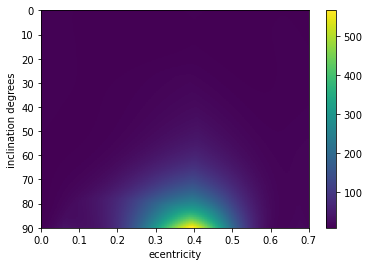

In [21]:
fig,ax= plt.subplots()
im=ax.imshow(np.min(a, axis= 2),extent = [min(ecentricitiestotest), max(ecentricitiestotest),max(inclinationstotest),min(inclinationstotest)], aspect='auto')

fig.colorbar(im)
ax.set_ylabel('inclination degrees')
ax.set_xlabel('ecentricity')


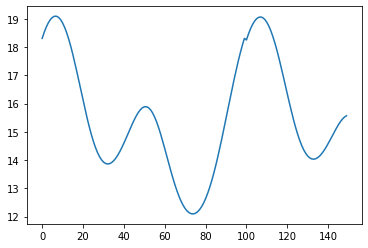

In [22]:
plt.plot(np.resize(a, 5*5*6))

In [17]:
np.savez("bigperiastron.npz",a=a,ecentricitiestotest=ecentricitiestotest,inclinationstotest=inclinationstotest, periastrontotest=periastrontotest)

NameError: name 'ecentricitiestotest' is not defined

In [18]:
f=np.load('bigperiastron.npz')
a = f["a"]
ecentricitiestotest = f['ecentricitiestotest']
inclinationstotest = f['inclinationstotest']
meananomolytotest = f['periastrontotest']


In [19]:
print(f["a"])

[[[18.30724244 18.52143742 18.7048207  ... 17.79652422 18.06470325
   18.30724244]
  [18.25073214 18.46290699 18.64630044 ... 17.74966038 18.01213754
   18.25073214]
  [18.20784094 18.41755685 18.60043104 ... 17.71689803 17.97349916
   18.20784073]
  ...
  [16.09550165 16.00087299 15.87195796 ... 16.17620435 16.15421279
   16.09550165]
  [16.40671336 16.32374533 16.20261773 ... 16.45253731 16.44988102
   16.40671336]
  [16.72573211 16.6555469  16.54331884 ... 16.73471857 16.75232572
   16.72573211]]

 [[18.33060187 18.54008629 18.71832629 ... 17.82804926 18.09235946
   18.33060187]
  [18.26543019 18.47273567 18.6509025  ... 17.77301858 18.03134222
   18.26543019]
  [18.21387357 18.41854519 18.59606834 ... 17.73214276 17.98427826
   18.21387357]
  ...
  [16.02293604 15.93246709 15.80819987 ... 16.09698854 16.07804246
   16.02293604]
  [16.34387707 16.26406128 16.14650941 ... 16.38484515 16.38438037
   16.34387707]
  [16.6731335  16.60509371 16.49535463 ... 16.67898092 16.69796826
   16.

6.808982454326428e-07


Text(0, 0.5, 'ecentricity')

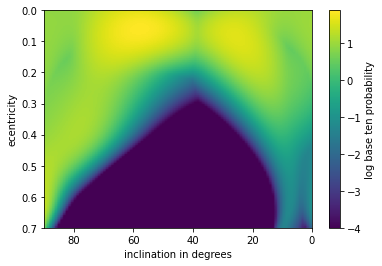

In [20]:
noplanetlikihood=np.exp(loglikelihood([0,120,0,90,
                                               4.6220554014026838e-01,1.6437004273382669e+00,
                                               10,1.40795,-90],actualbrucetransittime , bruceerr, yesplot= False)*-1)
print(noplanetlikihood)
planetlikihood = np.exp(-1*np.min(a, axis= 2))
fig,ax= plt.subplots()
im=ax.imshow(np.maximum(np.log10(planetlikihood/noplanetlikihood),-4 ),extent = [max(inclinationstotest),min(inclinationstotest),max(ecentricitiestotest), min(ecentricitiestotest)], aspect='auto')

fig.colorbar(im, label = 'log base ten probability')
ax.set_xlabel('inclination in degrees')
ax.set_ylabel('ecentricity')


In [21]:
print((np.log10(planetlikihood/noplanetlikihood)))

[[ 0.91324461  0.91402427  0.91237824 ...  0.98867551  0.99106838
   0.98835847]
 [ 0.91471523  0.91697487  0.91573504 ...  0.99352068  0.99756399
   0.99648384]
 [ 0.91762168  0.91918297  0.91903878 ...  0.99671704  1.0025309
   1.00318352]
 ...
 [ 0.80601006  0.22878612 -0.48563344 ... -2.77905111 -2.26432809
  -1.68975725]
 [ 0.65087485 -0.01595775 -0.80901011 ... -3.06732173 -2.50901598
  -1.88222425]
 [ 0.45571946 -0.27332727 -1.19148792 ... -3.42652205 -2.81327891
  -2.12269654]]


In [22]:
print(noplanetlikihood)
print(planetlikihood)
print(np.min(a, axis = 2))

6.808982454326428e-07
[[5.57605210e-06 5.58607148e-06 5.56493956e-06 ... 6.63372904e-06
  6.67038030e-06 6.62888810e-06]
 [5.59496590e-06 5.62415240e-06 5.60811940e-06 ... 6.70815207e-06
  6.77089694e-06 6.75407776e-06]
 [5.63253498e-06 5.65282034e-06 5.65094383e-06 ... 6.75770536e-06
  6.84877844e-06 6.85907788e-06]
 ...
 [4.35604419e-06 1.15310362e-06 2.22560854e-07 ... 1.13248147e-09
  3.70470919e-09 1.39099306e-08]
 [3.04759369e-06 6.56333333e-07 1.05699299e-07 ... 5.83123422e-10
  2.10894977e-09 8.93013369e-09]
 [1.94447194e-06 3.62873243e-07 4.38121226e-08 ... 2.55011736e-10
  1.04665441e-09 5.13317031e-09]]
[[12.09702954 12.09523429 12.09902443 ... 11.92334346 11.91783368
  11.92407348]
 [12.09364331 12.08844031 12.09129512 ... 11.91218704 11.90287699
  11.90536412]
 [12.08695095 12.08335596 12.08368798 ... 11.90482717 11.89144025
  11.88993755]
 ...
 [12.34394621 13.67305345 15.31806527 ... 20.59885462 19.41366107
  18.09066282]
 [12.70115823 14.23659705 16.06266758 ... 21.2626

In [23]:
test=loglikelihood([0.02,130,ecentricitiestotest[c],inclinationstotest[d],
                                               4.6220554014026838e-01,periastrontotest[e],
                                               -1.9584857031843157e+01,1.40795,-90],actualbrucetransittime , bruceerr, yesplot= True)
print(test)
print(noplanetlikihood)

NameError: name 'c' is not defined

In [1]:

noplanetlikihood=np.exp(loglikelihood([0,120,0,90,
                                               4.6220554014026838e-01,1.6437004273382669e+00,
                                               10,1.40795,-90],actualbrucetransittime , bruceerr, yesplot= False)*-1)
print(noplanetlikihood)
planetlikihood = np.exp(-1*a[:,0,:])
fig,ax= plt.subplots()
im=ax.imshow(np.maximum(np.log10(planetlikihood/noplanetlikihood),-4 ),extent = [max(inclinationstotest),min(inclinationstotest),max(ecentricitiestotest), min(ecentricitiestotest)], aspect='auto')

fig.colorbar(im, label = 'log base ten probability')
ax.set_xlabel('periastron')
ax.set_ylabel('ecentricity')
print(np.shape(a))
print(np.shape(planetlikihood))

NameError: name 'np' is not defined

In [25]:
test=loglikelihood([1/1047.572,130,ecentricitiestotest[35],inclinationstotest[0],
                                               4.6220554014026838e-01,periastrontotest[e],
                                               -1.9584857031843157e+01,1.40795,-90],actualbrucetransittime , bruceerr, yesplot= True)
print(test)
#print(noplanetlikihood)
#a[c,d,e]=loglikelihood([1/1047.572,130,ecentricitiestotest[c],inclinationstotest[d],
                                               #4.6220554014026838e-01,1.6437004273382669e+00,
                                               #meananomolytotest[e],1.40795,-90],actualbrucetransittime , bruceerr)
print(a[35,0,0])
print(a[35,0,1])
planetlikihood = np.exp(-1*a[35,0,1])
ratio = np.maximum(np.log10(planetlikihood/noplanetlikihood),-4 ) 
print(ratio)



NameError: name 'periastrontotest' is not defined

(100, 100)

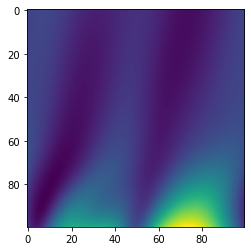

In [32]:
fig,ax= plt.subplots()
im=ax.imshow(np.log(a[:,0,:]))
np.shape(a[:,0,:])

[[0.48049588 0.84453911 0.60331958 0.12376022 0.23206755 0.76326154]
 [0.82087039 0.9479292  0.45960522 0.86097504 0.49677526 0.61413096]
 [0.10452152 0.54733938 0.67721797 0.47833138 0.01728624 0.69167954]]


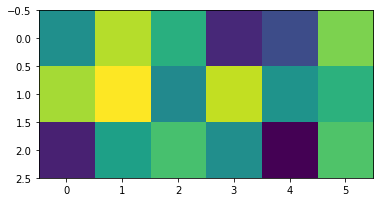

In [33]:
junk=np.random.uniform(0,1,(3,6))
print(junk)
fig,ax= plt.subplots()
im=ax.imshow(junk)
